# Compare ISOFIT run time  with different instance types

In [89]:
import json
import os
import pandas as pd
import IPython
import datetime as dt 
import re
import numpy as np
import warnings
import pandas as pd
import requests
import statsmodels.api as sm

warnings.filterwarnings("ignore")

from maap.maap import MAAP
maap = MAAP(maap_host="sister-api.imgspec.org")

In [2]:
job_list = maap.listJobs('anonymous').text
jobs  = json.loads(job_list)

In [3]:
crid= "002"
pattern = f"^SISTER.*{crid}$"
start = dt.datetime(2023, 4, 28, 0, 0)

In [ ]:
emit_rdn_datasets = []

for job in jobs['jobs']:
    job_id = list(job.keys())[0]
    tag = job[job_id]['tags'][0]
    tag = tag.upper()
    output_datasets=[]

    if re.match(pattern,tag):

        job_info = {}
        job_info['id'] = job_id
        status = job[job_id]['status'].replace('job-','')
        
        if 'CWL' in tag:
            sister,sensor,product,datetime,crid = tag.split('_')
            PGE = product
        else:
            sister,sensor,level,product,datetime,crid = tag.split('_')
            PGE = f'{level}_{product}'

        job_info['sensor'] = sensor
        if sensor == 'EMIT' and  PGE == 'L1B_RDN' and  status  =='completed':
      
            if 'metrics' in job[job_id]['job']['job_info'].keys():
                for staged in job[job_id]['job']['job_info']['metrics']['products_staged']:
                        for url in staged['urls']:
                            if (url.startswith('s3')) and ('dps_output' not in url):
                                print(url)
                                output_datasets.append(url)

            emit_rdn_datasets.append(output_datasets)




In [ ]:
len(emit_rdn_datasets)
print(emit_rdn_datasets[0])
emit_rdn_datasets.sort()

## Run c59xLarge benchmark

In [13]:
for l1b_dataset in emit_rdn_datasets[10:]:

    l1b_dataset.sort()
    l1b_rdn,l1b_loc,l1b_obs = l1b_dataset

    date = os.path.basename(l1b_rdn).split('_')[4]
    
    identifier = f'EMIT_ISOFIT_BENCHMARK_c59xLarge_{date}'
    print(identifier)
    break
    isofit_job_response = maap.submitJob(
                                    algo_id="sister-isofit",
                                    version="sister-dev",
                                    radiance_dataset=l1b_rdn,
                                    location_dataset = l1b_loc,
                                    observation_dataset = l1b_obs,
                                    segmentation_size = 40,
                                    n_cores=36,
                                    crid = 500,
                                    publish_to_cmr=False,
                                    cmr_metadata={},
                                    queue="sister-job_worker-32gb",
                                    identifier= identifier)
    status=isofit_job_response.status
    print(f'\t{status}')

EMIT_ISOFIT_BENCHMARK_c59xLarge_20230202T222219
	success
EMIT_ISOFIT_BENCHMARK_c59xLarge_20230203T184937
	success
EMIT_ISOFIT_BENCHMARK_c59xLarge_20230219T185854
	success
EMIT_ISOFIT_BENCHMARK_c59xLarge_20230220T194114
	success
EMIT_ISOFIT_BENCHMARK_c59xLarge_20230221T063842
	success
EMIT_ISOFIT_BENCHMARK_c59xLarge_20230221T081014
	success
EMIT_ISOFIT_BENCHMARK_c59xLarge_20230224T054535
	success
EMIT_ISOFIT_BENCHMARK_c59xLarge_20230227T155702
	success
EMIT_ISOFIT_BENCHMARK_c59xLarge_20230324T190334
	success
EMIT_ISOFIT_BENCHMARK_c59xLarge_20230325T230026
	success


## Run c518xLarge with hyperthreading benchmark

In [10]:
for l1b_dataset in emit_rdn_datasets[10:]:

    l1b_dataset.sort()
    l1b_rdn,l1b_loc,l1b_obs = l1b_dataset

    date = os.path.basename(l1b_rdn).split('_')[4]
    
    identifier = f'EMIT_ISOFIT_BENCHMARK_c518xLargeHT_{date}'
    print(identifier)
    isofit_job_response = maap.submitJob(
                                    algo_id="sister-isofit",
                                    version="sister-dev",
                                    radiance_dataset=l1b_rdn,
                                    location_dataset = l1b_loc,
                                    observation_dataset = l1b_obs,
                                    segmentation_size = 40,
                                    n_cores=72,
                                    crid = 501,
                                    publish_to_cmr=False,
                                    cmr_metadata={},
                                    queue="sister-job_worker-c5-18xlarge",
                                    identifier= identifier)
    status=isofit_job_response.status
    print(f'\t{status}')

EMIT_ISOFIT_BENCHMARK_c518xLargeHT_20230202T222219
	success
EMIT_ISOFIT_BENCHMARK_c518xLargeHT_20230203T184937
	success
EMIT_ISOFIT_BENCHMARK_c518xLargeHT_20230219T185854
	success
EMIT_ISOFIT_BENCHMARK_c518xLargeHT_20230220T194114
	success
EMIT_ISOFIT_BENCHMARK_c518xLargeHT_20230221T063842
	success
EMIT_ISOFIT_BENCHMARK_c518xLargeHT_20230221T081014
	success
EMIT_ISOFIT_BENCHMARK_c518xLargeHT_20230224T054535
	success
EMIT_ISOFIT_BENCHMARK_c518xLargeHT_20230227T155702
	success
EMIT_ISOFIT_BENCHMARK_c518xLargeHT_20230324T190334
	success
EMIT_ISOFIT_BENCHMARK_c518xLargeHT_20230325T230026
	success


## Run c518xLarge without hyperthreading benchmark

In [49]:
for l1b_dataset in emit_rdn_datasets[10:]:

    l1b_dataset.sort()
    l1b_rdn,l1b_loc,l1b_obs = l1b_dataset

    date = os.path.basename(l1b_rdn).split('_')[4]
    
    identifier = f'EMIT_ISOFIT_BENCHMARK_c518xLargenHT_{date}'
    print(identifier)
    break
    isofit_job_response = maap.submitJob(
                                    algo_id="sister-isofit",
                                    version="sister-dev",
                                    radiance_dataset=l1b_rdn,
                                    location_dataset = l1b_loc,
                                    observation_dataset = l1b_obs,
                                    segmentation_size = 40,
                                    n_cores=36,
                                    crid = 502,
                                    publish_to_cmr=False,
                                    cmr_metadata={},
                                    queue="sister-job_worker-32gb",
                                    identifier= identifier)
    status=isofit_job_response.status
    print(f'\t{status}')

EMIT_ISOFIT_BENCHMARK_c518xLarge_nHT_20220810T174213


In [120]:
jobs  = json.loads(job_list)
job_list = maap.listJobs('anonymous').text

## Get results

In [121]:
bench_df = pd.DataFrame(index=[os.path.basename(x[0]).split('_')[4] for x in emit_rdn_datasets[10:]],
                        columns =['C59XLARGE','C518XLARGEHT','C518XLARGENHT'])
bench_df.index.name = 'EMIT Scene'

pattern = f"EMIT_ISOFIT_BENCHMARK_.*"
start = dt.datetime(2023, 6, 20, 0, 0)

for job in jobs['jobs']:
    job_id = list(job.keys())[0]
    tag = job[job_id]['tags'][0]
    tag = tag.upper()

    if re.match(pattern,tag):
        instance = tag.split('_')[3]
        status = job[job_id]['status'].replace('job-','')
        if status  =='completed':
            if 'metrics' in job[job_id]['job']['job_info'].keys():
                for staged in job[job_id]['job']['job_info']['metrics']['products_staged']:
                        for url in staged['urls']:
                            if (url.startswith('http')) and ('dps_output' not in url) and not(url.endswith("UNC")):
                                basename = os.path.basename(url)
                                metadata_url= f'{url}/{basename}.met.json'
                                metadata = requests.get(metadata_url).json()
                                bench_df.loc[basename.split('_')[4],instance] = metadata['apply_oe_runtime']
        

## Absolute time (sec)

In [122]:
bench_df

,C59XLARGE,C518XLARGEHT,C518XLARGENHT
EMIT Scene,,,
20230202T222219,8082.306178,4256.471527,NaN
20230203T184937,3191.600188,1826.602212,NaN
20230219T185854,6013.063705,3089.594355,NaN
20230220T194114,3605.161631,1943.51053,NaN
20230221T063842,3930.994603,2173.461813,NaN
20230221T081014,5592.926625,3094.798864,NaN
20230224T054535,3458.220853,1943.989447,NaN
20230227T155702,5718.894956,3127.546714,NaN
20230324T190334,7605.876656,4138.208733,NaN


## Compute time relative to C5.9xlarge

In [123]:
(bench_df.T/(bench_df['C59XLARGE'])).T

,C59XLARGE,C518XLARGEHT,C518XLARGENHT
EMIT Scene,,,
20230202T222219,1.0,0.526641,NaN
20230203T184937,1.0,0.572315,NaN
20230219T185854,1.0,0.513814,NaN
20230220T194114,1.0,0.539091,NaN
20230221T063842,1.0,0.552904,NaN
20230221T081014,1.0,0.553342,NaN
20230224T054535,1.0,0.562136,NaN
20230227T155702,1.0,0.54688,NaN
20230324T190334,1.0,0.54408,NaN


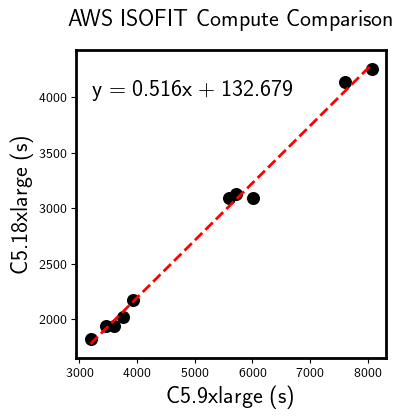

In [147]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble='\\usepackage{sfmath}')
plt.rc('font', family='serif')
line_width =2 
font_size = 17
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.scatter(bench_df['C59XLARGE'],bench_df['C518XLARGEHT'],c='k',s = 70)
ax.set_xlabel(r"$\mathrm{C5.9xlarge\ (s)}$",fontsize = font_size) 
ax.set_ylabel(r"$\mathrm{C5.18xlarge\ (s)}$" ,fontsize = font_size) 

x = bench_df['C59XLARGE'].values.astype(float)
y = bench_df['C518XLARGEHT'].values.astype(float)

predict_x =np.linspace(x.min(),x.max())
model = sm.OLS(y,sm.add_constant(x), missing='drop').fit()
b0,b1 = np.round(model.params,3)
predict_y = model.predict(sm.add_constant(predict_x))
equation = f'y = {b1}x + {b0}'
ax.text(.05,.85,r"$\mathrm{%s}$" % equation,
         transform=ax.transAxes,fontsize = font_size) 
ax.plot(predict_x,predict_y,c = 'r',lw=2,ls ='--')


ax.spines['top'].set_linewidth(line_width)

ax.spines['right'].set_linewidth(line_width)
#change axes line widths
ax.spines['bottom'].set_linewidth(line_width)
ax.spines['left'].set_linewidth(line_width)
_= ax.set_title(r"$\mathrm{AWS\ ISOFIT\ Compute\ Comparison}$",
             fontsize = font_size,y=1.05)